# Assignment 1: Gradient Descent


---

본 과제에서는 경사하강법(Gradient Descent)를 구현해보도록 하겠습니다.

## 1. Gradient Descent (1)

먼저 [SymPy library](https://www.sympy.org/en/index.html)를 사용하여 간단한 이차함수의 최솟값을 gradient descent 방법으로 찾는 문제입니다. - AI Math 3강 참고

(SymPy: 수학 방정식의 기호(symbol)를 사용하게 해 주는 라이브러리)

 #### **def func**
- `sym.poly` 함수는 함수식을 정의해줍니다.

- `sym.subs` 함수는 변수를 다른변수로 치환하거나 값을 대입해줍니다.


#### **func_gradient**
- `sym.diff` 함수는 도함수를 구해줍니다.
- `func` 함수를 사용하여 미분값과 함수를 return하는 코드를 짜야합니다.

#### **gradient_descent**
- `init_point`는 경사하강법의 시작점을 의미합니다.
- `lr_rate`는 learning rate로 step의 크기를 정해줍니다.
- `epsilon`은 gradient 크기의 lower bound입니다.
- init_point부터 경사하강법을 시작해서, 최소점이 출력될 수 있도록 코드를 짜야합니다.

In [41]:
import numpy as np
import sympy as sym
from sympy.abc import x
from sympy.plotting import plot

def func(val):
    fun = sym.poly(x**2 + 2*x + 3)
    return fun.subs(x, val), fun

def func_gradient(fun, val):
    ## TODO
    _, function = func(val)
    diff = sym.diff(function, x)
    
    return diff.subs(x, val), diff

def gradient_descent(fun, init_point, lr_rate=1e-2, epsilon=1e-5):
    cnt = 0
    val = init_point
    ## Todo
    diff, _ = func_gradient(fun,val)
    while(np.abs(diff) > epsilon):
#         if(np.abs(diff) > 0):
#             val -= lr_rate
#         else:
#             val += lr_rate

        val = val - lr_rate*diff
    
        diff, _ = func_gradient(fun,val)
        cnt += 1
    print("함수: {}\n연산횟수: {}\n최소점: ({}, {})".format(fun(val)[1], cnt, val, fun(val)[0]))

- 최종적으로 함수, 연산횟수, 최소점(-1,2)이 출력되면 됩니다.

In [42]:
gradient_descent(fun = func, init_point = 40)

함수: Poly(x**2 + 2*x + 3, x, domain='ZZ')
연산횟수: 788
최소점: (-0.999995000443250, 2.00000000002500)


## 2. Gradient Descent (2)

- 위의 예제에서 (-1,2)와 거의 동일한 최소점을 얻으셨나요? 그럼 이번에는 sympy library를 사용하지 않고 직접 Gradient Descent를 구현해봅시다!




$$ f'(x) = \lim_{h \rightarrow
 0} \frac{f(x+h)-f(x)}{h} $$

- 원래의 미분 공식은 위와 같이 h를 0의 극한으로 보내면 되지만, 컴퓨터 상에서는 불가능하기 때문에 h에 1e-9와 같이 아주 작은 수를 넣어줌으로써 유사한 변화율을 구합니다.

#### **difference_quotient(f, x, h)**
- h만큼 움직였을 때의 변화율을 계산해주는 코드입니다.
- h는 1e-9와 같이 매우 작은 수가 들어갑니다.
- f에는 아래에 정의된 func 함수가 들어가고, x에는 변화율을 계산할 point가 들어갑니다.

In [47]:
def func(val):
    fun = sym.poly(x**2 + 2*x + 3)
    return fun.subs(x, val)

def difference_quotient(f, x, h=1e-9):
    ## Todo
    result = (func(x + h) - func(x)) / h 
    
    return result

def gradient_descent(func, init_point, lr_rate=1e-2, epsilon=1e-5):
    cnt = 0
    val = init_point
    ## Todo
    diff = difference_quotient(func,val)
    
    while(np.abs(diff) > epsilon):
        val = val - lr_rate*diff
    
        diff = difference_quotient(func,val)
        cnt += 1
    print("연산횟수: {}\n최소점: ({}, {})".format(cnt, val, func(val)))

- 최종적으로 연산횟수, 최소점(-1,2)이 출력되면 됩니다.


In [48]:
gradient_descent(func, init_point=3)

연산횟수: 672
최소점: (-0.999994846459742, 2.00000000002656)


## 3. Linear Regression
- sympy library를 사용했을 때와 비슷한 결과값을 얻었나요?
- 그럼 이제 본격적으로 Gradient Descent를 활용한 Linear Regression을 구현해 봅시다.

### **3-1. Basic function**
#### **Dataset 1** : train_x, train_y
$$y = wx + b$$ $$y = 7x + 2$$
- 위의 식을 알아내기 위해서 train_x, train_y의 data point를 가지고 Linear Regression을 진행합니다.

#### **Gradient Descent**
- error를 어떻게 계산하고, gradient를 통해 w와 b를 어떻게 조정해 나가는지에 대한 코드를 짜주시면 됩니다.
    - error는 L2 norm으로 사용하고, np.sum 함수를 활용하시면 됩니다.
- 결과값이 (7,2)와 유사하게 출력이 되면 성공입니다 !

In [56]:
train_x = (np.random.rand(1000) - 0.5) * 10
train_y = np.zeros_like(train_x)

def func(val):
    fun = sym.poly(7*x + 2)
    return fun.subs(x, val)

for i in range(1000):
    train_y[i] = func(train_x[i])

# initialize
w, b = 0.0, 0.0

lr_rate = 1e-2
n_data = len(train_x)
errors = []

for i in range(100):
    ## Todo
    # 예측값 y
    _y = w * train_x + b

    # gradient
    gradient_w = np.sum((_y - train_y) * train_x) / n_data
    gradient_b = np.sum((_y - train_y)) / n_data

    # w, b update with gradient and learning rate
    w -= lr_rate * gradient_w
    b -= lr_rate * gradient_b

    # L2 norm과 np_sum 함수 활용해서 error 정의
    error = np.sum((_y - train_y) ** 2) / n_data
    # Error graph 출력하기 위한 부분
    errors.append(error)

print("w : {} / b : {} / error : {}".format(w, b, error))

w : 6.99263416114259 / b : 1.247922836317234 / error : 0.576933794621898


* 이제 plot 함수를 이용해서 full-batch gradient descent를 사용한 경우, error가 어떻게 줄어드는지 확인해봅시다.

In [53]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

def plot(errors):
    clear_output(True)
    plt.figure(figsize=(20,5))
    plt.ylabel('error')
    plt.xlabel('time step')
    plt.plot(errors)
    plt.show()

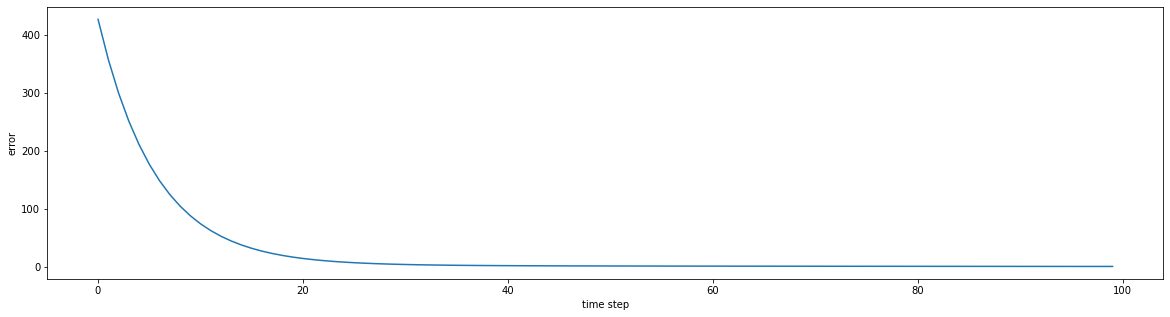

In [54]:
plot(errors)

### **3.2. More complicated function**
#### **Dataset 2** : train_x, train_y
- 이번에는 좀 더 복잡한 선형식에 대한 Regression을 진행해봅시다 !
$$ y = w_0x_0 + w_1x_1 + w_2x_2 + b $$
$$ y = x_0 + 3x_1 + 5x_2 + 7$$

- 각 element의 계수를 beta_gd로 설정 : random initialize ( 목표 정답은 [1, 3, 5, 7] )
- 이번에는 np.transpose 함수를 활용하여 gradient를 계산해봅시다 ( AI Math 4강 참고 )

In [80]:
train_x = np.array([[1,1,1], [1,1,2], [1,2,2], [2,2,3], [2,3,3], [1,2,3]])
train_y = np.dot(train_x, np.array([1,3,5])) + 7

# random initialize
beta_gd = [9.4, 10.6, -3.7, -1.2]
# for constant element
expand_x = np.array([np.append(x, [1]) for x in train_x])

for t in range(50000):
    ## Todo
    pred_y = expand_x @ beta_gd
    error = train_y - pred_y
    
    grad = -np.transpose(expand_x) @ error

    beta_gd = beta_gd - 0.008 * grad
    

print("After gradient descent, beta_gd : {}".format(beta_gd))

After gradient descent, beta_gd : [1. 3. 5. 7.]


## 4. Stochastic Gradient Descent



- 3-1의 문제와 동일한 문제에 대해서 Stochastic Gradient Descent를 사용해봅시다.

- Code와 dataset 모두 동일하게 사용하되, 기존의 Dataset으로부터 mini-batch를 구성해서 Gradient Descent를 진행해주시면 됩니다.
    - mini-batch의 경우, **np.random.choice** 함수를 활용하셔서 1,000개의 dataset 중 10개를 뽑아서 만들어주시면 됩니다.

In [ ]:
train_x = (np.random.rand(1000) - 0.5) * 10
train_y = np.zeros_like(train_x)

def func(val):
    fun = sym.poly(7*x + 2)
    return fun.subs(x, val)

for i in range(1000):
    train_y[i] = func(train_x[i])

# initialize
w, b = 0.0, 0.0

lr_rate = 1e-2
n_data = 10
errors = []

for i in range(100):
    ## Todo


    # Error graph 출력하기 위한 부분
    errors.append(error)

print("w : {} / b : {} / error : {}".format(w, b, error))

- plot 함수를 이용해서 mini-batch를 사용한 stochastic gradient descent의 경우, error가 어떻게 줄어드는지 확인해봅시다.
- 3.1의 full-batch gradient descent를 사용한 경우와 plot을 통해 비교를 해보면 차이를 좀 더 명확히 확인할 수 있습니다.
    - full-batch의 경우, 매 epoch마다 전체 dataset을 모두 사용하여 GD를 하기 때문에 그래프가 매끄럽지만, SGD에 비하여 초기 수렴속도가 느린 편입니다.
    - mini-batch의 경우, 매 epoch마다 mini-batch를 sampling해서 GD를 하기 때문에 그래프가 매끄럽지 않지만, 그만큼 초기에 빠르게 minimum으로 수렴하는 것을 확인할 수 있습니다.

In [ ]:
plot(errors)